/Users/hunkilim/miniconda3/envs/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hunkilim/miniconda3/envs/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hunkilim/miniconda3/envs/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hunkilim/miniconda3/envs/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

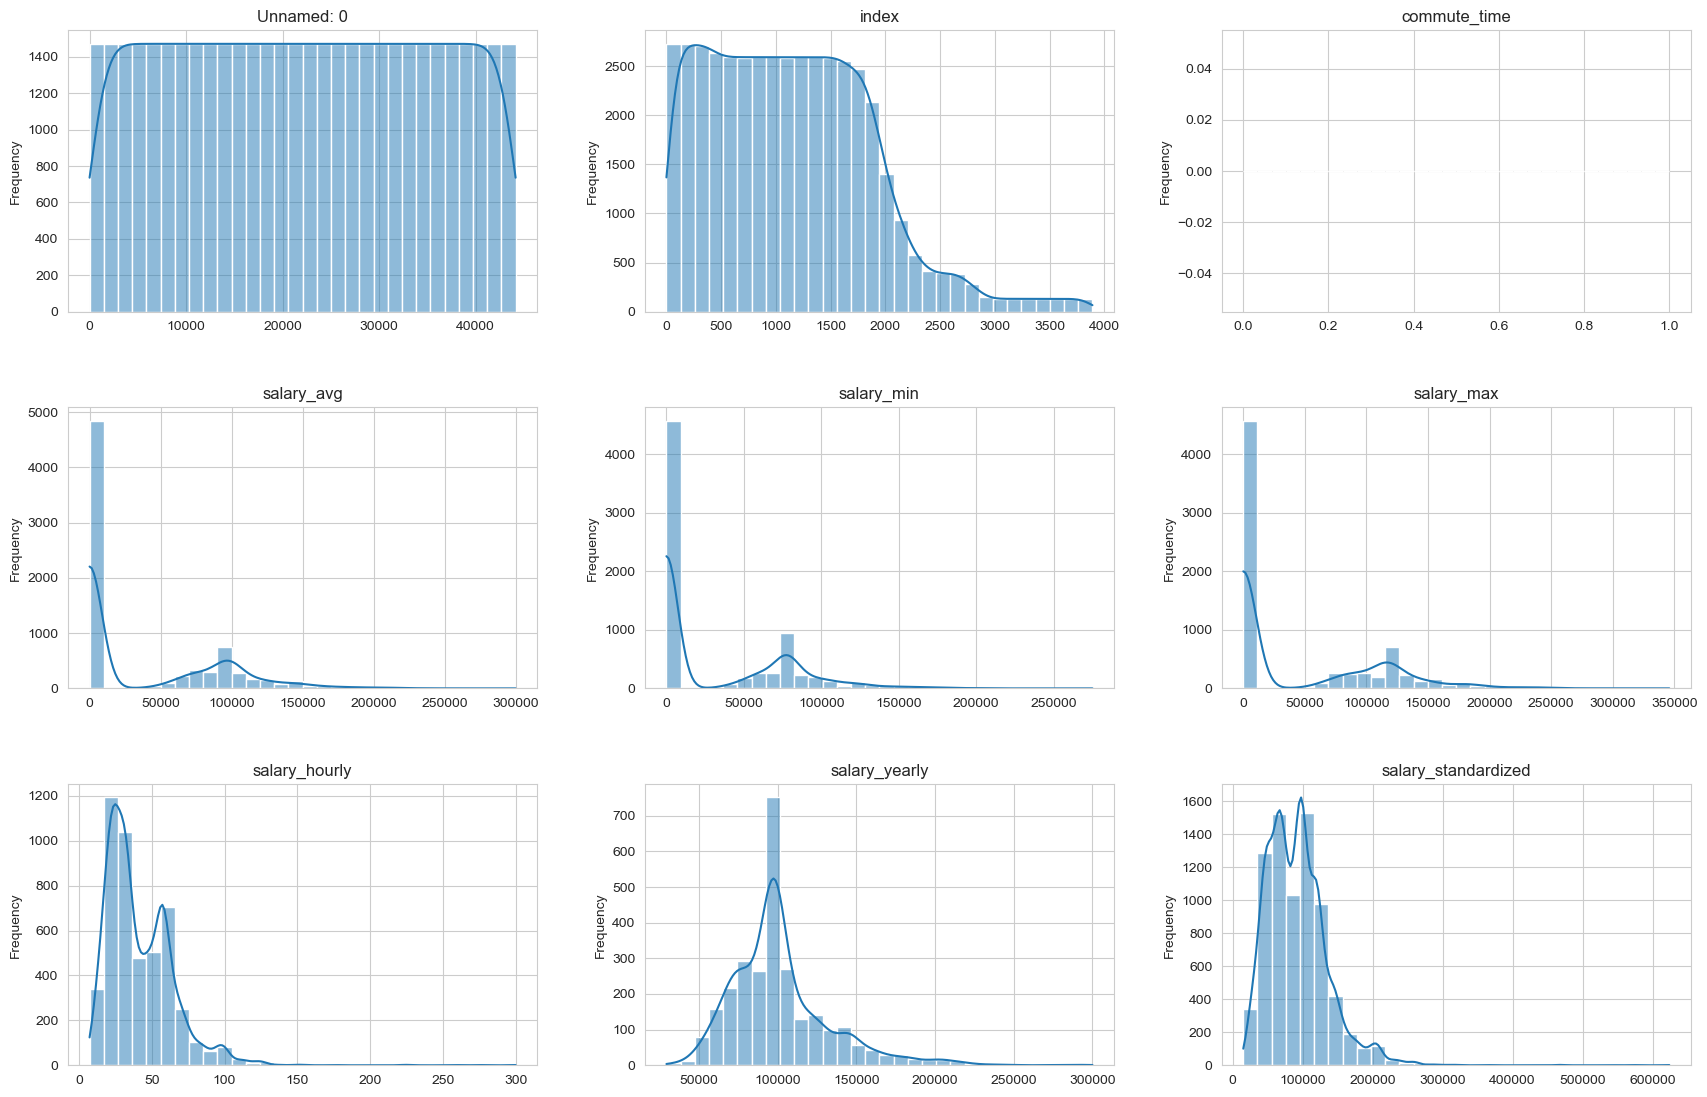

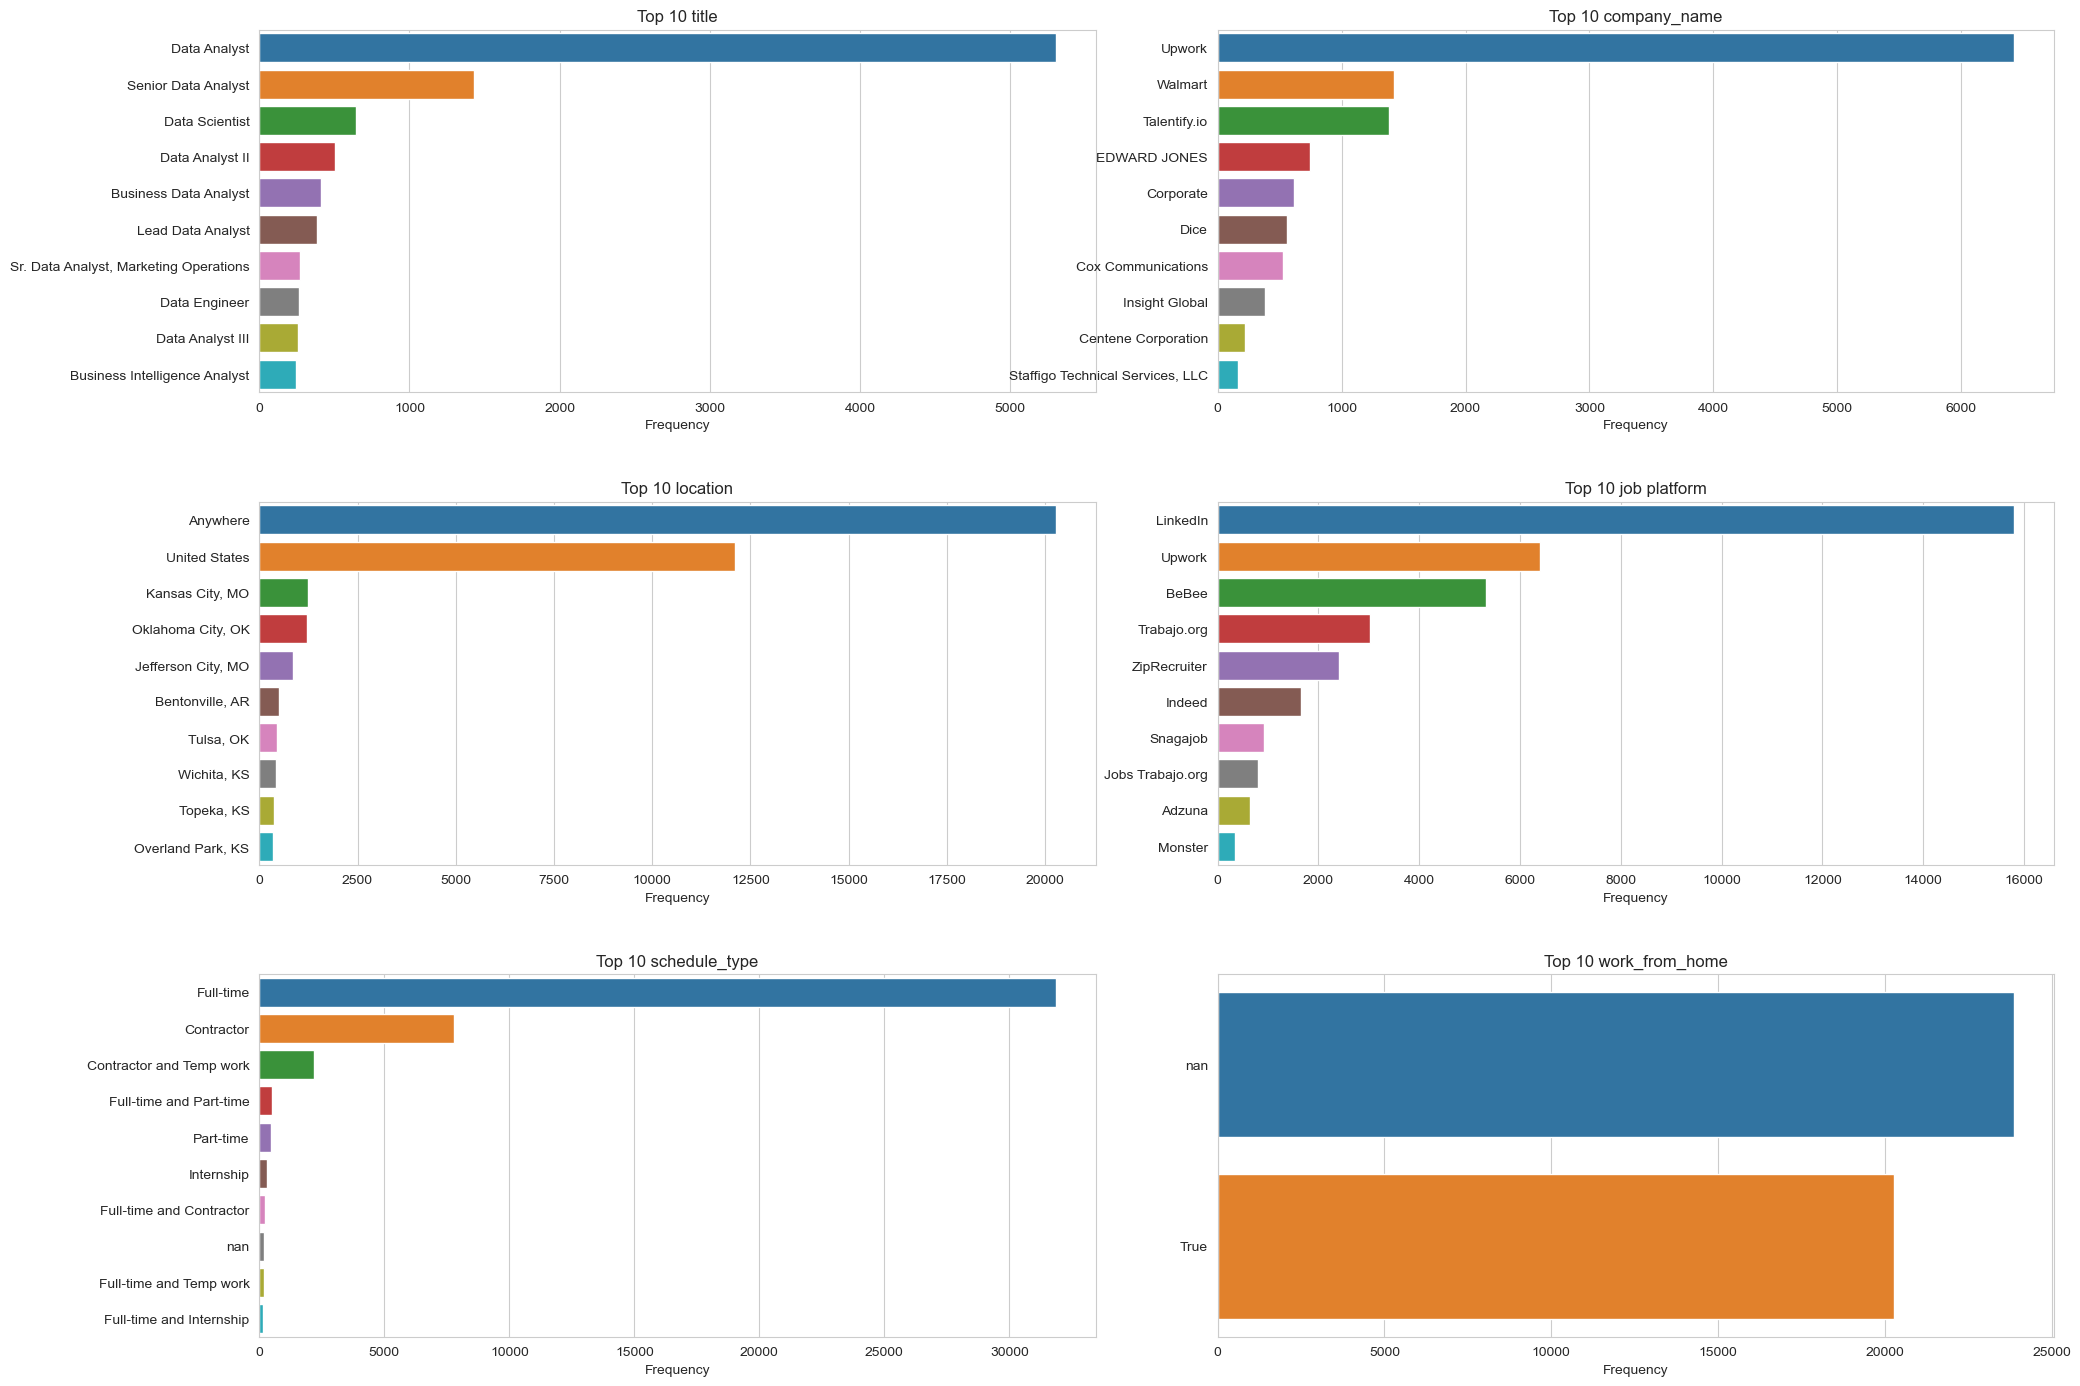

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import os

# Load the dataset from the ZIP file
zip_path = './archive.zip'  # Adjust this path as necessary
extracted_folder_path = './extracted_data'

# Extract the ZIP file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Assuming there is only one CSV file in the ZIP, or you know the file name
csv_file_name = 'gsearch_jobs.csv'  # Adjust this filename as necessary
csv_file_path = os.path.join(extracted_folder_path, csv_file_name)
data = pd.read_csv(csv_file_path)

# Identify non-numeric columns and rename "via" column to "job platform"
data.rename(columns={'via': 'job platform'}, inplace=True)

# Remove "via " prefix from the "job platform" column values
data['job platform'] = data['job platform'].str.replace('via ', '')

# Clean non-numeric columns by removing leading and trailing spaces
non_numeric_columns = data.select_dtypes(exclude=['int64', 'float64']).columns
data[non_numeric_columns] = data[non_numeric_columns].apply(lambda x: x.astype(str).str.strip() if x.dtype == "object" else x)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting histograms for numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

def plot_numeric_columns(df, columns):
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
    fig.tight_layout(pad=5.0)
    
    for i, column in enumerate(columns):
        ax = axes[i//n_cols, i%n_cols]
        sns.histplot(df[column], bins=30, ax=ax, kde=True if df[column].nunique() > 1 else False)
        ax.set_title(column)
        ax.set_xlabel('')
        ax.set_ylabel('Frequency')

    # Hide any unused axes
    for j in range(i + 1, n_cols * n_rows):
        axes[j//n_cols, j%n_cols].set_visible(False)

plot_numeric_columns(data, numeric_columns)

def plot_non_numeric_columns(df, columns, n_top=10):
    n_cols = 2
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*10, n_rows*5))
    fig.tight_layout(pad=6.0)

    for i, column in enumerate(columns):
        ax = axes[i//n_cols, i%n_cols]
        top_categories = df[column].value_counts().head(n_top)
        sns.barplot(x=top_categories, y=top_categories.index, ax=ax)
        ax.set_title(f'Top {n_top} {column}')
        ax.set_xlabel('Frequency')
        ax.set_ylabel('')

    # Hide any unused axes
    for j in range(i + 1, n_cols * n_rows):
        axes[j//n_cols, j%n_cols].set_visible(False)

# Select a subset of non-numeric columns to visualize due to high cardinality in some columns
columns_to_visualize = ['title','company_name', 'location', 'job platform', 'schedule_type', 'work_from_home']

# Plotting bar charts for selected non-numeric columns
plot_non_numeric_columns(data, columns_to_visualize)


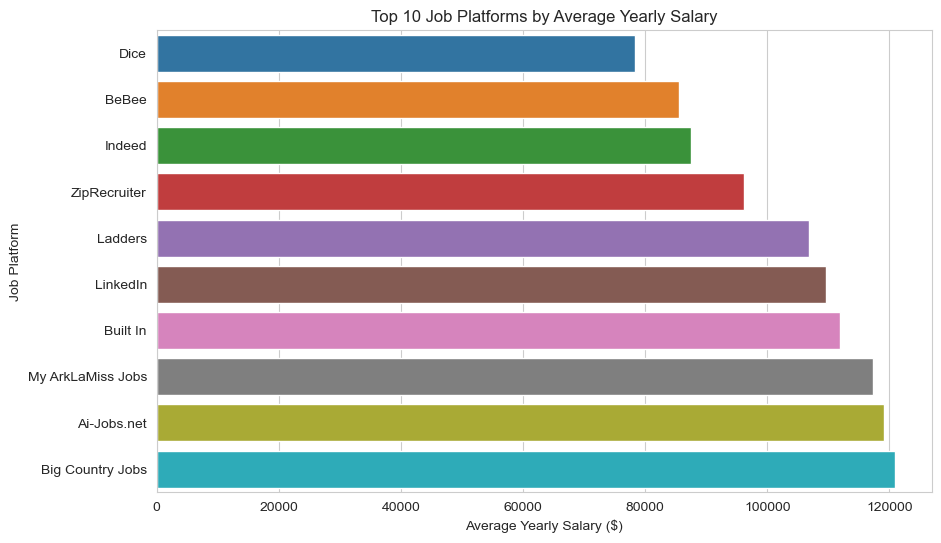

In [3]:
# Filter the dataset to include only rows with non-null yearly salary data
salary_data = data[data['salary_yearly'].notnull()]

# Group by 'job platform', calculate the average yearly salary, and count the job listings
platform_salary = salary_data.groupby('job platform')['salary_yearly'].agg(['mean', 'count'])

# Sort the job platforms by the count of job listings and then select the top 10
top_platforms = platform_salary.sort_values(by='count', ascending=False).head(10)

# Sort the top platforms by the average yearly salary for plotting
top_platforms_sorted_by_salary = top_platforms.sort_values(by='mean', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_platforms_sorted_by_salary['mean'], y=top_platforms_sorted_by_salary.index)
plt.title('Top 10 Job Platforms by Average Yearly Salary')
plt.xlabel('Average Yearly Salary ($)')
plt.ylabel('Job Platform')
plt.show()


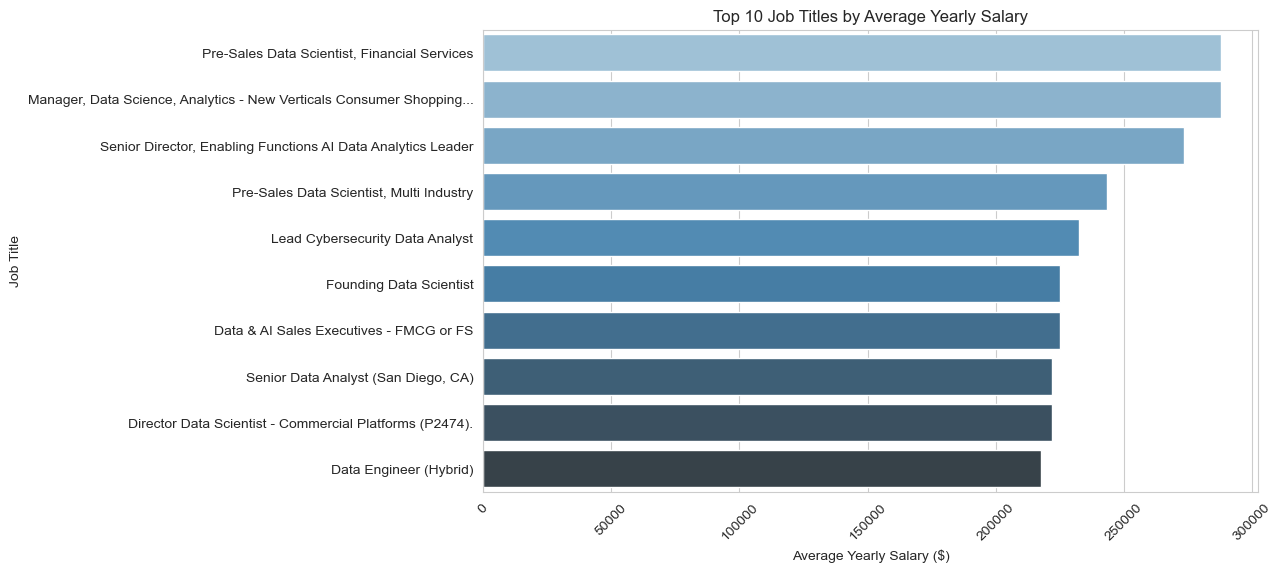

In [4]:
#### Next, plot the top 10 most common job title based on yearly average salary
# Filter the dataset to include only rows with non-null yearly salary data
salary_data = data[data['salary_yearly'].notnull()]

# Group by 'title', calculate the average yearly salary, and count the job listings
title_salary = salary_data.groupby('title')['salary_yearly'].agg(['mean', 'count'])

# Sort the job titles by the average yearly salary and then select the top 10
top_titles = title_salary.sort_values(by='mean', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_titles['mean'], y=top_titles.index, palette="Blues_d")
plt.title('Top 10 titles by Average Yearly Salary')
plt.xlabel('Average Yearly Salary ($)')
plt.ylabel('title')
plt.xticks(rotation=45)
plt.show()


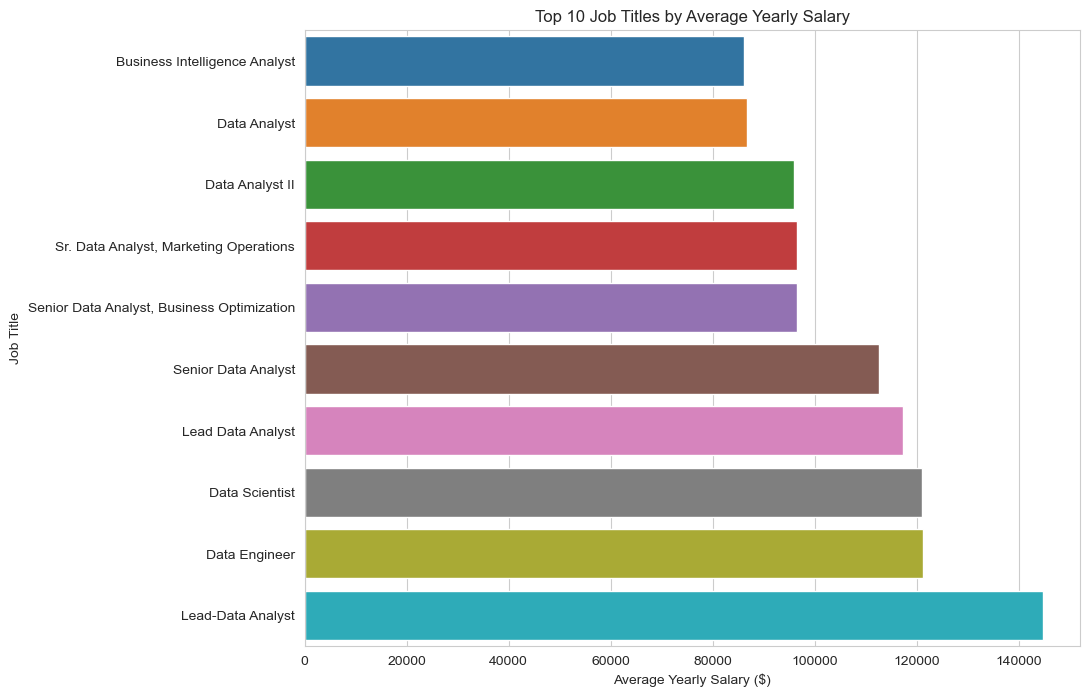

In [5]:
####Next, plot the top 10 most common title frequently include yearly salary and what the average salaries are for those titles
# Filter the dataset to include only rows with non-null yearly salary data
salary_data = data[data['salary_yearly'].notnull()]

# Group by 'title', calculate the average yearly salary, and count the job listings
title_salary = salary_data.groupby('title')['salary_yearly'].agg(['mean', 'count'])

# Sort the job titles by the count of job listings and then select the top 10
top_titles = title_salary.sort_values(by='count', ascending=False).head(10)

# Sort the top titles by the average yearly salary for plotting
top_titles_sorted_by_salary = top_titles.sort_values(by='mean', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=top_titles_sorted_by_salary['mean'], y=top_titles_sorted_by_salary.index)
plt.title('Top 10 Job Titles by Average Yearly Salary')
plt.xlabel('Average Yearly Salary ($)')
plt.ylabel('Job Title')
plt.show()


In [10]:
# Remove rows where 'salary_yearly' is NaN
data_clean = data.dropna(subset=['salary_yearly'])

# Proceed with preprocessing
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X = data_clean[['title', 'job platform', 'location']]
X_encoded = encoder.fit_transform(X)

y = data_clean['salary_yearly']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Feature importance
feature_names = encoder.get_feature_names_out(input_features=['title', 'job platform', 'location'])
importances = random_forest_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Print the top 10 most important features
print("Top 10 Feature Importances:")
for i in range(10):
    print(f"{feature_names[sorted_indices[i]]}: {importances[sorted_indices[i]]}")


/Users/hunkilim/miniconda3/envs/py/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Root Mean Squared Error (RMSE): 25480.288384771495
Top 10 Feature Importances:
title_Principal Data Scientist: 0.0474622763690195
title_Data Analyst: 0.03390403458306176
title_Lead-Data Analyst: 0.032626369911351094
job platform_Ai-Jobs.net: 0.0325543414238962
job platform_LinkedIn: 0.02874146505014787
job platform_Indeed: 0.017396765191998093
title_Data Engineer (Hybrid): 0.015329219844379315
title_Data Scientist, Product Analytics - Monetization: 0.015006711247436084
title_Manager, Data Science, Analytics - New Verticals Consumer Shopping...: 0.014395176294583065
title_Pre-Sales Data Scientist, Financial Services: 0.014295788956675255


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Ensuring that the salary_yearly column doesn't have NaN values
data = data.dropna(subset=['salary_yearly'])

# Preparing the features matrix X by one-hot encoding the categorical variables
# Preparing the target vector y
encoder = OneHotEncoder()
X = encoder.fit_transform(data[['title', 'job platform', 'location']])
y = data['salary_yearly']

# Splitting the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
random_forest.fit(X_train, y_train)

# Predicting the yearly salary on the test set
y_pred = random_forest.predict(X_test)

# Calculating the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse


25462.90671718935